### Exploratory Data Analysis

#####  Roles to Explore:

In [ ]:
#Importing Libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filtering and Plotting US Data Analyst Locations

In [5]:
df_DA_US = df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]

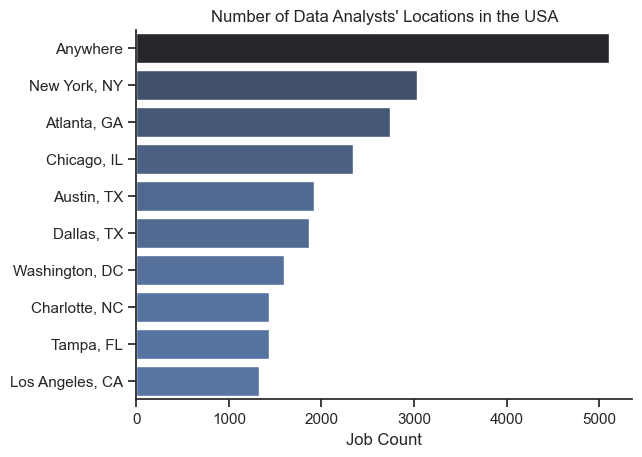

In [ ]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r')
sns.despine()

plt.title('Number of Data Analysts\' Locations in the USA')
plt.ylabel('')
plt.xlabel('Job Count')
plt.legend().set_visible(False)
plt.show()

### Job Facilities

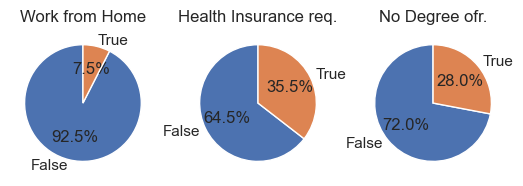

In [18]:
fig, ax = plt.subplots(1, 3)

job_dict = {'job_work_from_home' : 'Work from Home',
            'job_health_insurance' : 'Health Insurance req.',
            'job_no_degree_mention' : 'No Degree ofr.'}

for i, (column, title) in enumerate(job_dict.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False','True'], startangle=90, autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()

### Popular Companies among Data Analysts

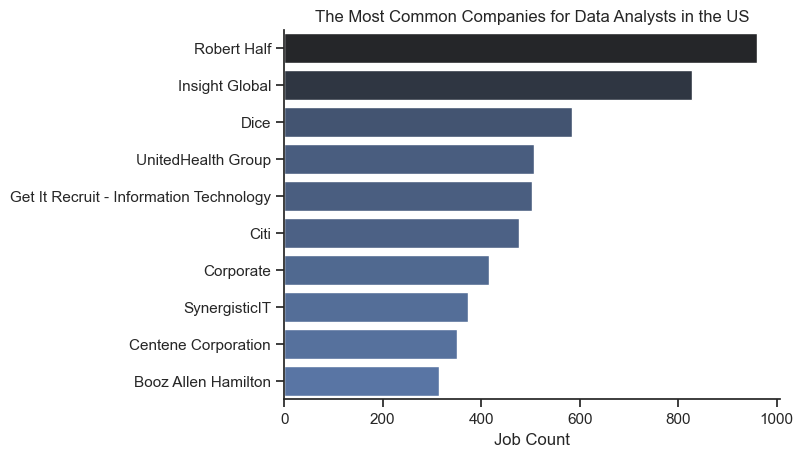

In [20]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r')
sns.despine()

plt.title('The Most Common Companies for Data Analysts in the US')
plt.ylabel('')
plt.xlabel('Job Count')
plt.legend().set_visible(False)
plt.show()